# Efficiency Plots for 2017:

Check efficiency plots w.r.t the reference (noringer)

In [20]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop, load_hdf
from core import Efficiency, restore_efficiencies
from Gaugi import mkdir_p, progressbar
import numpy as np
import pandas as pd
import collections
import os
import rootplotlib as rpl
from pprint import pprint
from copy import deepcopy
import gc
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1) Read all files:

In [21]:
output_path = 'output/efficiencies'
output_path = 'output'
mkdir_p(output_path)

In [22]:
eff_data17_Zee_noringer  = restore_efficiencies( '../data/output/emulation/data17_Zee_efficiency_noringer.root' )
eff_data17_JF17_noringer = restore_efficiencies( '../data/output/emulation/data17_JF17_efficiency_noringer.root')

In [23]:
eff_data17_Zee_v8  = restore_efficiencies( '../2021/v8/output/emulation/data17_Zee_efficiency_v8.root'  )
eff_data17_Zee_v9  = restore_efficiencies( 'v9/output/emulation/data17_Zee_efficiency_v9.root'  )
eff_data17_Zee_v10 = restore_efficiencies( 'v10/output/emulation/data17_Zee_efficiency_v10.root')
eff_data17_Zee_v11 = restore_efficiencies( 'v11/output/emulation/data17_Zee_efficiency_v11.root')
eff_data17_Zee_v12 = restore_efficiencies( 'v12/output/emulation/data17_Zee_efficiency_v12.root')
eff_data17_Zee_v13 = restore_efficiencies( 'v13/output/emulation/data17_Zee_efficiency_v13.root')
eff_data17_Zee_v14 = restore_efficiencies( 'v14/output/emulation/data17_Zee_efficiency_v14.root')
eff_data17_Zee_v15 = restore_efficiencies( 'v15/output/emulation/data17_Zee_efficiency_v15.root')
eff_data17_Zee_v16 = restore_efficiencies( 'v16/output/emulation/data17_Zee_efficiency_v16.root')

In [24]:
eff_data17_JF17_v8  = restore_efficiencies( '../2021/v8/output/emulation/data17_JF17_efficiency_v8.root'  )
eff_data17_JF17_v9  = restore_efficiencies( 'v9/output/emulation/data17_JF17_efficiency_v9.root'  )
eff_data17_JF17_v10 = restore_efficiencies( 'v10/output/emulation/data17_JF17_efficiency_v10.root')
eff_data17_JF17_v11 = restore_efficiencies( 'v11/output/emulation/data17_JF17_efficiency_v11.root')
eff_data17_JF17_v12 = restore_efficiencies( 'v12/output/emulation/data17_JF17_efficiency_v12.root')
eff_data17_JF17_v13 = restore_efficiencies( 'v13/output/emulation/data17_JF17_efficiency_v13.root')
eff_data17_JF17_v14 = restore_efficiencies( 'v14/output/emulation/data17_JF17_efficiency_v14.root')
eff_data17_JF17_v15 = restore_efficiencies( 'v15/output/emulation/data17_JF17_efficiency_v15.root')
eff_data17_JF17_v16 = restore_efficiencies( 'v16/output/emulation/data17_JF17_efficiency_v16.root')

In [25]:
def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.25,textsize=18, option='p' )

# Part I:

## Zee:

In [28]:
legends = [
           #'without Ringer',
           'with Ringer (v8)', 
           'with Ringer (v9)',
           'with Ringer (v10)',
           'with Ringer (v11)',
           'with Ringer (v16)',
           ]

### HLT_e17

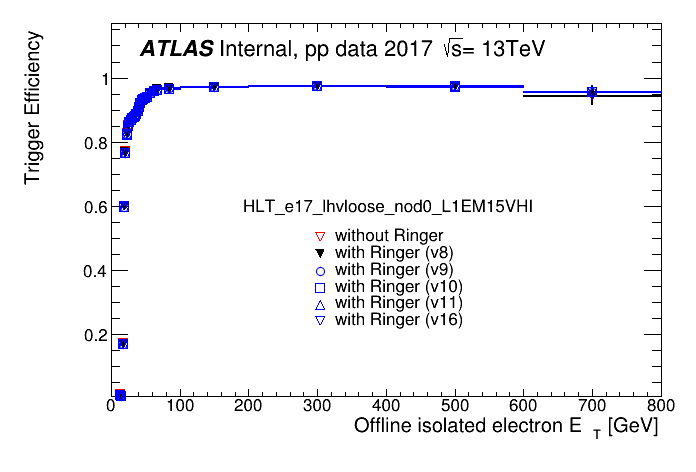

In [15]:
#colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]
colors = [kRed, kBlack, kBlue, kBlue, kBlue, kBlue]
#markers = [23, 24,25,26,27]
markers = [32, 23, 24,25,26,32, 32]

hists = [
            eff_data17_Zee_noringer.profile('HLT_e17_lhvloose_nod0_noringer_L1EM15VHI', 'HLT','highet'),
            eff_data17_Zee_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'HLT','highet'),
            eff_data17_Zee_v9.profile('HLT_e17_lhvloose_nod0_ringer_v9_L1EM15VHI', 'HLT','highet'),
            eff_data17_Zee_v10.profile('HLT_e17_lhvloose_nod0_ringer_v10_L1EM15VHI', 'HLT','highet'),
            eff_data17_Zee_v11.profile('HLT_e17_lhvloose_nod0_ringer_v11_L1EM15VHI', 'HLT','highet'),
            eff_data17_Zee_v16.profile('HLT_e17_lhvloose_nod0_ringer_v16_L1EM15VHI', 'HLT','highet'),


        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.44,0.3, legends)
rpl.add_text( 0.35, 0.55, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_part_i_2017_HLT_highet.pdf')

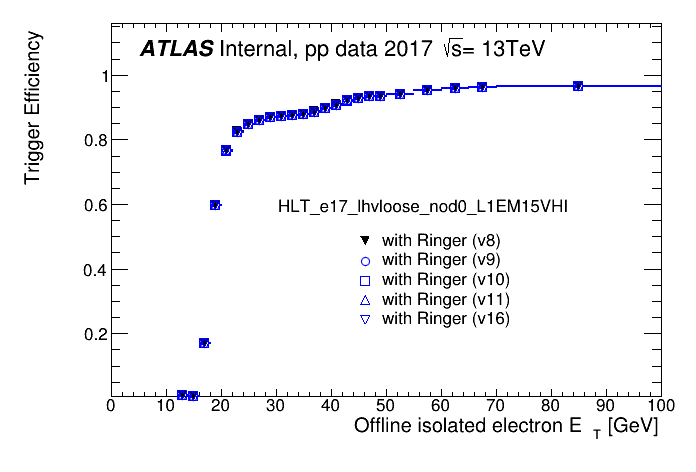

In [9]:
#colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]
colors = [kBlack, kBlue, kBlue, kBlue, kBlue]
#markers = [23, 24,25,26,27]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_Zee_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'HLT','et'),
            eff_data17_Zee_v9.profile('HLT_e17_lhvloose_nod0_ringer_v9_L1EM15VHI', 'HLT','et'),
            eff_data17_Zee_v10.profile('HLT_e17_lhvloose_nod0_ringer_v10_L1EM15VHI', 'HLT','et'),
            eff_data17_Zee_v11.profile('HLT_e17_lhvloose_nod0_ringer_v11_L1EM15VHI', 'HLT','et'),
            eff_data17_Zee_v16.profile('HLT_e17_lhvloose_nod0_ringer_v16_L1EM15VHI', 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.50,0.3, legends)
rpl.add_text( 0.4, 0.55, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_part_i_2017_HLT_et.pdf')

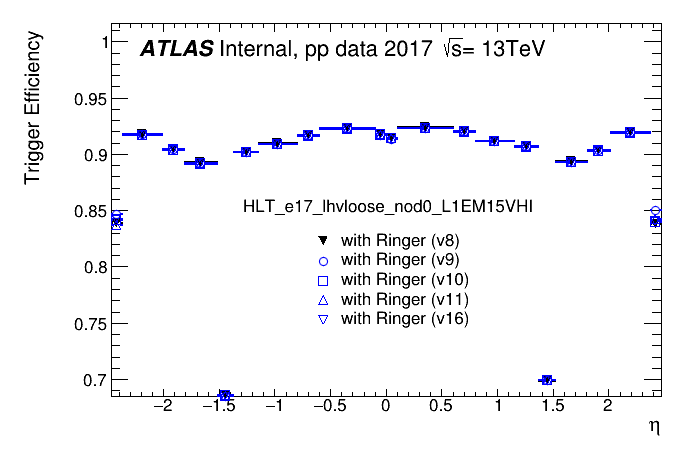

In [10]:
colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]

colors = [kBlack, kBlue, kBlue, kBlue, kBlue]

markers = [23, 24,25,26,32]
hists = [
            eff_data17_Zee_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'HLT','eta'),
            eff_data17_Zee_v9.profile('HLT_e17_lhvloose_nod0_ringer_v9_L1EM15VHI', 'HLT','eta'),
            eff_data17_Zee_v10.profile('HLT_e17_lhvloose_nod0_ringer_v10_L1EM15VHI', 'HLT','eta'),
            eff_data17_Zee_v11.profile('HLT_e17_lhvloose_nod0_ringer_v11_L1EM15VHI', 'HLT','eta'),
            eff_data17_Zee_v16.profile('HLT_e17_lhvloose_nod0_ringer_v16_L1EM15VHI', 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.44,0.3, legends)
rpl.add_text( 0.35, 0.55, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_part_i_2017_HLT_eta.pdf')

### HLT e28:

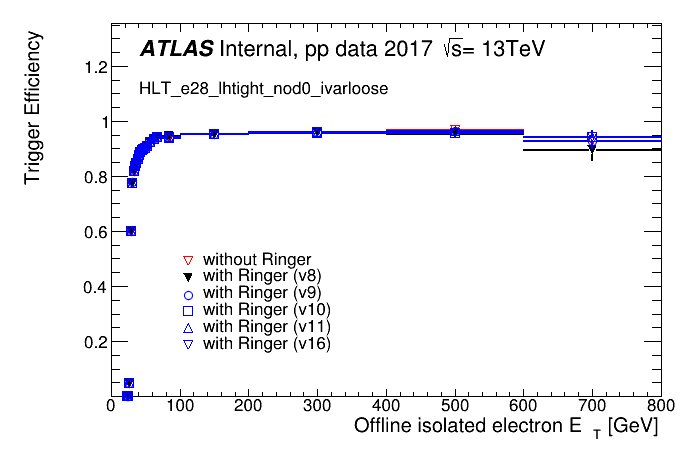

In [18]:
colors = [kRed, kBlack, kBlue, kBlue, kBlue, kBlue]
markers = [32, 23,24,25,26,32]

hists = [
            eff_data17_Zee_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'HLT','highet'),
            eff_data17_Zee_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose'  , 'HLT','highet'),
            eff_data17_Zee_v9.profile('HLT_e28_lhtight_nod0_ringer_v9_ivarloose'  , 'HLT','highet'),
            eff_data17_Zee_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'HLT','highet'),
            eff_data17_Zee_v11.profile('HLT_e28_lhtight_nod0_ringer_v11_ivarloose', 'HLT','highet'),
            eff_data17_Zee_v16.profile('HLT_e28_lhtight_nod0_ringer_v16_ivarloose'  , 'HLT','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.25,0.25, legends)
rpl.add_text( 0.2, 0.8, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.4) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_part_i_2017_HLT_highet.pdf')

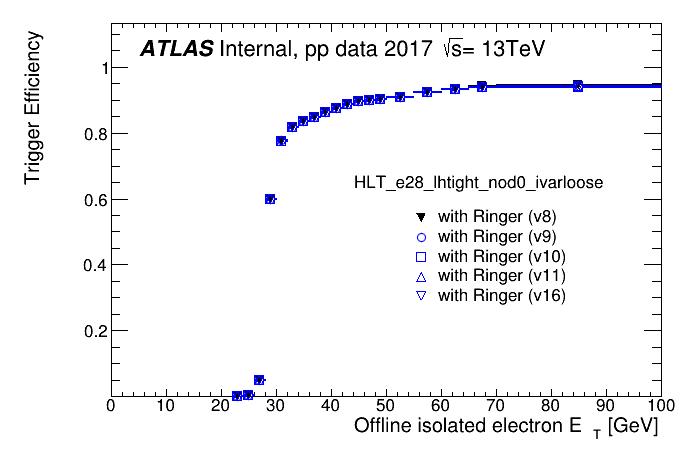

In [12]:
#colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]
colors = [kBlack, kBlue, kBlue, kBlue, kBlue]
#markers = [23, 24,25,26,27]
markers = [23, 24,25,26,32]

hists = [
            eff_data17_Zee_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose'  , 'HLT','et'),
            eff_data17_Zee_v9.profile('HLT_e28_lhtight_nod0_ringer_v9_ivarloose'  , 'HLT','et'),
            eff_data17_Zee_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'HLT','et'),
            eff_data17_Zee_v11.profile('HLT_e28_lhtight_nod0_ringer_v11_ivarloose', 'HLT','et'),
            eff_data17_Zee_v16.profile('HLT_e28_lhtight_nod0_ringer_v16_ivarloose'  , 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.58,0.35, legends)
rpl.add_text( 0.51, 0.6, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_part_i_2017_HLT_et.pdf')

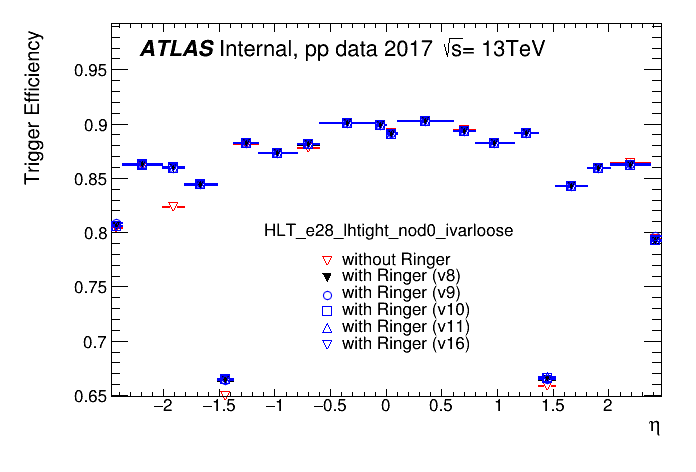

In [19]:
#colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]
colors = [kRed, kBlack, kBlue, kBlue, kBlue, kBlue]
#markers = [23, 24,25,26,27]
markers = [32, 23, 24,25,26,32]

hists = [
            eff_data17_Zee_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'HLT','eta'),
            eff_data17_Zee_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose'  , 'HLT','eta'),
            eff_data17_Zee_v9.profile('HLT_e28_lhtight_nod0_ringer_v9_ivarloose'  , 'HLT','eta'),
            eff_data17_Zee_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'HLT','eta'),
            eff_data17_Zee_v11.profile('HLT_e28_lhtight_nod0_ringer_v11_ivarloose', 'HLT','eta'),
            eff_data17_Zee_v16.profile('HLT_e28_lhtight_nod0_ringer_v16_ivarloose'  , 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.45,0.25, legends)
rpl.add_text( 0.38, 0.5, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_part_i_2017_HLT_eta.pdf')

## Fakes:

### HLT_e17:

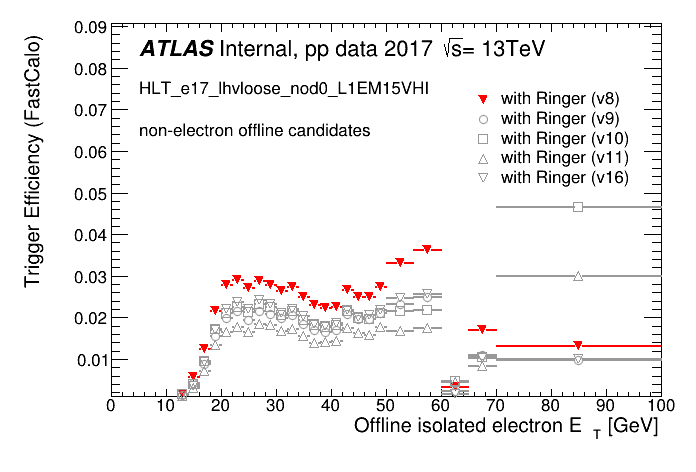

In [29]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'L2Calo','et'),
            eff_data17_JF17_v9.profile('HLT_e17_lhvloose_nod0_ringer_v9_L1EM15VHI', 'L2Calo','et'),
            eff_data17_JF17_v10.profile('HLT_e17_lhvloose_nod0_ringer_v10_L1EM15VHI', 'L2Calo','et'),
            eff_data17_JF17_v11.profile('HLT_e17_lhvloose_nod0_ringer_v11_L1EM15VHI', 'L2Calo','et'),
            eff_data17_JF17_v16.profile('HLT_e17_lhvloose_nod0_ringer_v16_L1EM15VHI', 'L2Calo','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.67,0.6, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.95) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e17_ringer_part_i_2017_L2Calo_et.pdf')

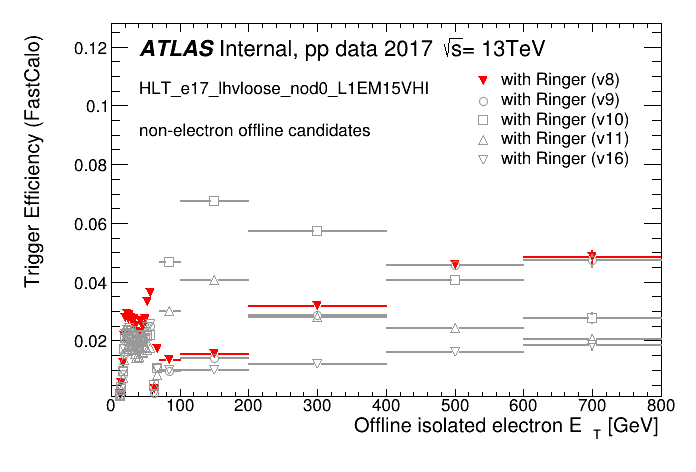

In [31]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'L2Calo','highet'),
            eff_data17_JF17_v9.profile('HLT_e17_lhvloose_nod0_ringer_v9_L1EM15VHI', 'L2Calo','highet'),
            eff_data17_JF17_v10.profile('HLT_e17_lhvloose_nod0_ringer_v10_L1EM15VHI', 'L2Calo','highet'),
            eff_data17_JF17_v11.profile('HLT_e17_lhvloose_nod0_ringer_v11_L1EM15VHI', 'L2Calo','highet'),
            eff_data17_JF17_v16.profile('HLT_e17_lhvloose_nod0_ringer_v16_L1EM15VHI', 'L2Calo','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.67,0.64, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.9) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e17_ringer_part_i_2017_L2Calo_highet.pdf')

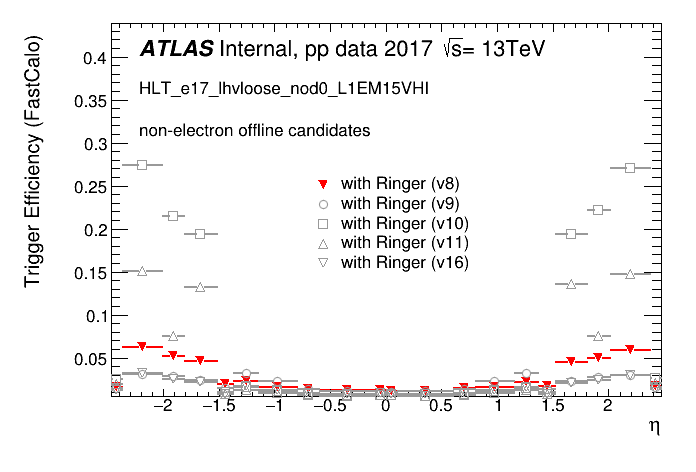

In [30]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'L2Calo','eta'),
            eff_data17_JF17_v9.profile('HLT_e17_lhvloose_nod0_ringer_v9_L1EM15VHI', 'L2Calo','eta'),
            eff_data17_JF17_v10.profile('HLT_e17_lhvloose_nod0_ringer_v10_L1EM15VHI', 'L2Calo','eta'),
            eff_data17_JF17_v11.profile('HLT_e17_lhvloose_nod0_ringer_v11_L1EM15VHI', 'L2Calo','eta'),
            eff_data17_JF17_v16.profile('HLT_e17_lhvloose_nod0_ringer_v16_L1EM15VHI', 'L2Calo','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.44,0.42, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.6) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e17_ringer_part_i_2017_L2Calo_eta.pdf')

# HLT_e28:

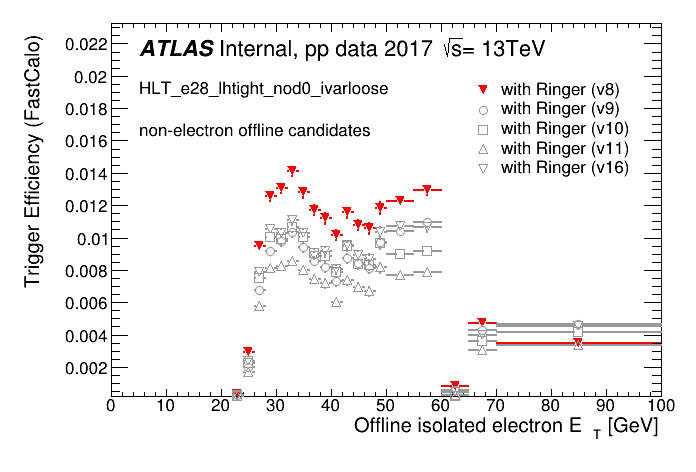

In [32]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'L2Calo','et'),
            eff_data17_JF17_v9.profile('HLT_e28_lhtight_nod0_ringer_v9_ivarloose', 'L2Calo','et'),
            eff_data17_JF17_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'L2Calo','et'),
            eff_data17_JF17_v11.profile('HLT_e28_lhtight_nod0_ringer_v11_ivarloose', 'L2Calo','et'),
            eff_data17_JF17_v16.profile('HLT_e28_lhtight_nod0_ringer_v16_ivarloose', 'L2Calo','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.67,0.62, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.65) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_part_i_2017_L2Calo_et.pdf')

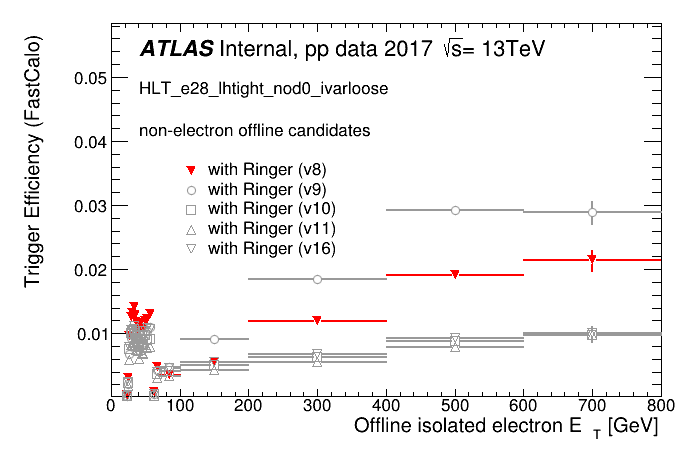

In [34]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'L2Calo','highet'),
            eff_data17_JF17_v9.profile('HLT_e28_lhtight_nod0_ringer_v9_ivarloose', 'L2Calo','highet'),
            eff_data17_JF17_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'L2Calo','highet'),
            eff_data17_JF17_v11.profile('HLT_e28_lhtight_nod0_ringer_v11_ivarloose', 'L2Calo','highet'),
            eff_data17_JF17_v16.profile('HLT_e28_lhtight_nod0_ringer_v16_ivarloose', 'L2Calo','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.25,0.45, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_part_i_2017_L2Calo_highet.pdf')

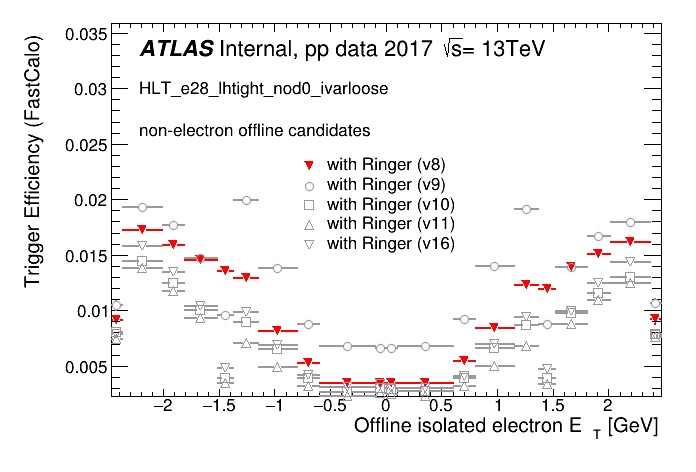

In [35]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'L2Calo','eta'),
            eff_data17_JF17_v9.profile('HLT_e28_lhtight_nod0_ringer_v9_ivarloose', 'L2Calo','eta'),
            eff_data17_JF17_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'L2Calo','eta'),
            eff_data17_JF17_v11.profile('HLT_e28_lhtight_nod0_ringer_v11_ivarloose', 'L2Calo','eta'),
            eff_data17_JF17_v16.profile('HLT_e28_lhtight_nod0_ringer_v16_ivarloose', 'L2Calo','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.42,0.46, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.8) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_part_i_2017_L2Calo_eta.pdf')